Installing Helper Functions

In [ ]:
!pip install iglovikov_helper_functions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jpeg4py: filename=jpeg4py-0.1.4-py3-none-any.whl size=8424 sha256=0655823308ebc30bd0cf4fd8adad3d01928ce5ca3bba0627ad1ca19fa081befa
  Stored in directory: /root/.cache/pip/wheels/86/c3/0f/348e6cadb3a27435e833d21d91707d653fb159d69f2a867a36
Successfully built jpeg4py


In [ ]:
!wget https://habrastorage.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg > /dev/null

--2024-03-05 09:26:30--  https://habrastorage.org/webt/em/l7/cr/eml7crxnxftrimsmolwjegqcrp4.jpeg
Resolving habrastorage.org (habrastorage.org)... 51.89.30.72
Connecting to habrastorage.org (habrastorage.org)|51.89.30.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55211 (54K) [image/jpeg]
Saving to: ‘eml7crxnxftrimsmolwjegqcrp4.jpeg’

eml7crxnxftrimsmolw 100%[===================>]  53.92K  --.-KB/s    in 0.1s    

2024-03-05 09:26:31 (481 KB/s) - ‘eml7crxnxftrimsmolwjegqcrp4.jpeg’ saved [55211/55211]



Installing cloth segmentation module from pypi

In [ ]:
!pip install cloths_segmentation  > /dev/null

In [ ]:
%matplotlib inline

Importing necessary modules

In [ ]:
import numpy as np

In [ ]:
import cv2

In [ ]:
import torch

In [ ]:
import albumentations as albu

In [ ]:
from pylab import imshow

In [ ]:
#trying to save on google drive, so, mounting it to my google drive
from google.colab import drive
drive.mount('/content/gdrive') # connects Colab to your Google Drive

Mounted at /content/gdrive


If you want to use cloth segmentation on images from gallary, run below code

In [ ]:

from google.colab import files
img = files.upload()
keys = list(img) # list of all image names from dictionary of images uploaded
allowefileformats = ['jpg','png','bmp','jpeg']
if len(img)!=1:
  print('Please Select only one image file')

elif keys[0].split('.')[-1] not in allowefileformats:
  print('Please select an image in formats: ',allowefileformats)

img_data = img[keys[-1]]
img_path = '"A:\Download\hero_heroo.jpg"'+keys[-1] # set root path to folder where you uploaded the data
with open(img_path,'wb') as f:
  f.write(img_data)
#image = load_rgb(img_path) #if this line will be uncommented, comment out below three lines

#from PIL import Image
#from io import BytesIO
#image = Image.open(BytesIO(img[keys[0]]))#----- this is related to below line

Saving hero_heroo.jpg to hero_heroo.jpg


Importing Important things from helper functions

In [ ]:
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

In [ ]:
from cloths_segmentation.pre_trained_models import create_model

In [ ]:
model = create_model("Unet_2020-10-30")

Downloading: "https://github.com/ternaus/cloths_segmentation/releases/download/0.0.1/weights.zip" to /root/.cache/torch/hub/checkpoints/weights.zip
100%|██████████| 47.0M/47.0M [00:00<00:00, 172MB/s]
/usr/local/lib/python3.10/dist-packages/torch/hub.py:682: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


In [ ]:
model.eval();

In [ ]:
image = load_rgb(img_path)

In [ ]:
#print(img)
print(img)

#files.view(keys[-1])
#image = np.array(image)

{'hero_heroo.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x05\x00\x03b\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x002\x00\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x01\x02\x04\x05\x06\x01\x01\x01\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xf4\x931\x96\xbbM\x04\xbcTY\t\t\x99\xc7*M\x82\xa5\xa0\xa8\x17\x10\x90\x00\t\t\x91\x13\x08Mb\xc6\x14\x95\xb1R[\x15\x0b\x15\x95\x90\x00\x05\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

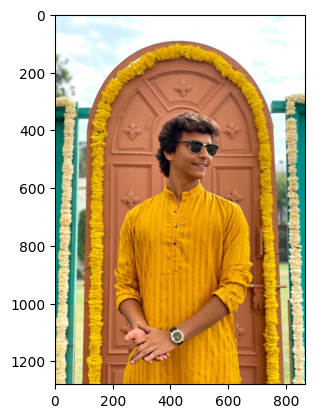

In [ ]:
#trying to
#imshow(image)
#files.download('.png')
imshow(image)

In [ ]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)

In [ ]:
padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)

In [ ]:
x = transform(image=padded_image)["image"]
x = torch.unsqueeze(tensor_from_rgb_image(x), 0)

In [ ]:
with torch.no_grad():
  prediction = model(x)[0][0]

In [ ]:
mask = (prediction > 0).cpu().numpy().astype(np.uint8)

In [ ]:
mask = unpad(mask, pads)

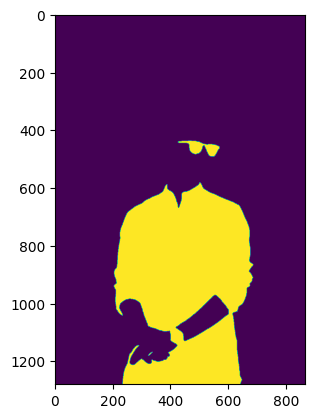

In [ ]:
imshow(mask)

In [ ]:
dst = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (0, 255, 0)).astype(np.uint8), 0.5, 0)

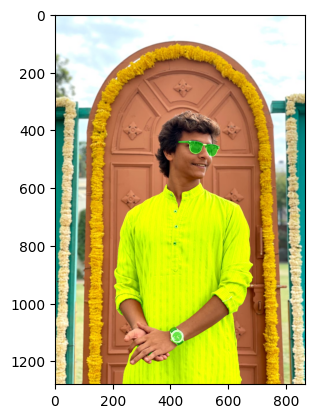

In [ ]:
imshow(dst)

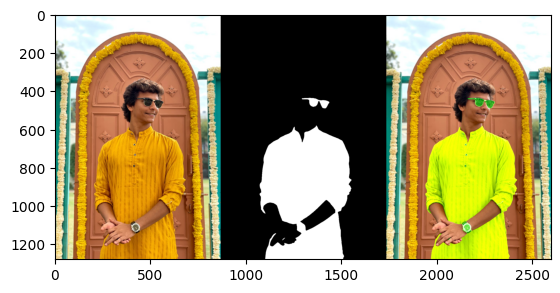

In [ ]:
imshow(np.hstack([image, cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * 255, dst]))